# Comparing profiles in the model vs. at the mooring *over time*

Rowan Brown | 07.04.2025

This notebook is for comparing profiles at the mooring and in the model (at various locations). There are two goals:
 1. Find dhere in the model could the mooring have been located relative to its plume
 2. Iteratively determine how long and with what magnitude the model should be forced

I will answer these questions using profiles. 

Some extra considerations:
 * How long should my EGU run be?
 * Resolution and mixing scheme? 
 * How to apply the cyclical forcing properly?

In [1]:
# Some imports
import numpy as np
import pandas as pd
import xmitgcm
import matplotlib.pylab as plt
import matplotlib as mpl
import xmitgcm.file_utils
import xmitgcm.utils
from MITgcmutils import density
import xarray as xr
import gsw
import basic_model_anayses as bma
from datetime import datetime

import sys
sys.path.insert(1, '../obs_analyses/')
import mooring_analyses
import woa_analyses

from mpl_toolkits import axisartist
from mpl_toolkits.axes_grid1 import host_subplot

## Model figures/calculations etc.

In [2]:
# Open the model data
#run = '../../../work/projects/p_so-clim/GCM_data/RowanMITgcm/mrb_034/'
run = '../MITgcm/so_plumes/mrb_052/'
ds_model = bma.open_mitgcm_output_all_vars(run)

# Adding density as a variable
ds_model = bma.calculate_sigma0_TEOS10(ds_model)

You need to test if you can use gsw in this way, feeding it ds and da etc


/tmp/ipykernel_2582296/2118324233.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


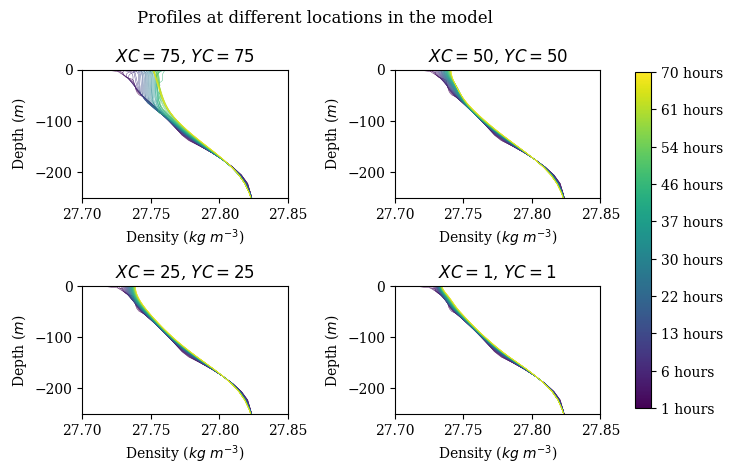

In [3]:
# Plotting /model/

# Slicing/aliasing (if it's already several hundred steps long; clunky but works)
ds = ds_model
if len(ds['time'].data)>250: ds = ds.isel(time = slice(0,-1,15) )

# Init figure
plt.rcParams["font.family"] = "serif" # change the base font
fig, ax = plt.subplots(nrows=2,ncols=2) 
plt.suptitle('Profiles at different locations in the model')

# Plotting in a loop
norm = plt.Normalize(0, len(ds['time'].data)) # Mapping time to the colourbar internal [0, 1] 
cmap = plt.cm.viridis # "viridis" is a nice colourmap that isn't, usually, a problem for people with colourblindness
for n, t in enumerate(ds['time'].data): # Looping through each date...
    c = cmap(norm(n)) # Obtaining the colour 
    ds['rho_theta'].isel(time=n,XC=75,YC=75).plot(y='Z', ax=ax[0,0], color=c, lw=0.3)
ax[0,0].set_xlabel('Density ($kg$ $m^{-3}$)')
ax[0,0].set_ylabel('Depth ($m$)')
ax[0,0].set_title('$XC=75$, $YC=75$')
ax[0,0].set_xlim(27.7,27.85)
ax[0,0].set_ylim(-250,0)

# The following is almost directly from Copilot, and it handles the colourbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) 
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1, 0.15, 0.025, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
tick_locs = np.linspace(0, len(ds['time'].data), len(ds['time'].data[::round(len(ds['time'].data)/10)]))
cbar.set_ticks(tick_locs)
cbar.set_ticklabels([ str(ds['time'].data[abs(int(tick-1))].astype('timedelta64[h]')) for tick in tick_locs])

# Other plots
for n, t in enumerate(ds['time'].data): # Looping through each date...
    c = cmap(norm(n)) # Obtaining the colour 
    ds['rho_theta'].isel(time=n,XC=50,YC=50).plot(y='Z', ax=ax[0,1], color=c, lw=0.3)
ax[0,1].set_xlabel('Density ($kg$ $m^{-3}$)')
ax[0,1].set_ylabel('Depth ($m$)')
ax[0,1].set_title('$XC=50$, $YC=50$')
ax[0,1].set_xlim(27.7,27.85)
ax[0,1].set_ylim(-250,0)

for n, t in enumerate(ds['time'].data): # Looping through each date...
    c = cmap(norm(n)) # Obtaining the colour 
    ds['rho_theta'].isel(time=n,XC=25,YC=25).plot(y='Z', ax=ax[1,0], color=c, lw=0.3)
ax[1,0].set_xlabel('Density ($kg$ $m^{-3}$)')
ax[1,0].set_ylabel('Depth ($m$)')
ax[1,0].set_title('$XC=25$, $YC=25$')
ax[1,0].set_xlim(27.7,27.85)
ax[1,0].set_ylim(-250,0)

for n, t in enumerate(ds['time'].data): # Looping through each date...
    c = cmap(norm(n)) # Obtaining the colour 
    ds['rho_theta'].isel(time=n,XC=1,YC=1).plot(y='Z', ax=ax[1,1], color=c, lw=0.3)
ax[1,1].set_xlabel('Density ($kg$ $m^{-3}$)')
ax[1,1].set_ylabel('Depth ($m$)')
ax[1,1].set_title('$XC=1$, $YC=1$')
ax[1,1].set_xlim(27.7,27.85)
ax[1,1].set_ylim(-250,0)

plt.tight_layout()


/tmp/ipykernel_481623/3303511971.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


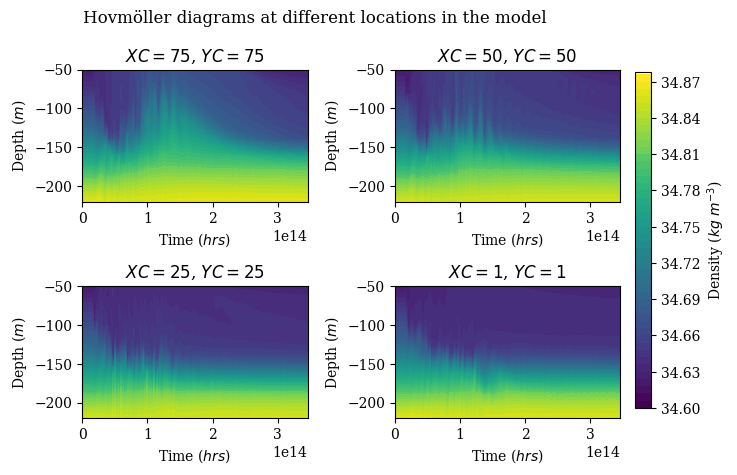

In [3]:
# Repeating plots above but with hovmoller diagrams 

ds = ds_model

# Init figure
plt.rcParams["font.family"] = "serif" # change the base font
fig, ax = plt.subplots(nrows=2,ncols=2) 
plt.suptitle('Hovmöller diagrams at different locations in the model')

norm = plt.Normalize(34.6, 34.878)#27.74, 27.832) # Mapping time to the colourbar internal [0, 1] 

# Plotting 4 subplots
p1 = ds['S'].isel(XC=75,YC=75).plot.contourf('time','Z',ax=ax[0,0],levels=50,cmap = plt.cm.viridis, norm=norm,add_colorbar=False)
ax[0,0].set_xlabel('Time ($hrs$)')
ax[0,0].set_ylabel('Depth ($m$)')
ax[0,0].set_title('$XC=75$, $YC=75$')
ax[0,0].set_ylim(-220,-50)
p1 = ds['S'].isel(XC=70,YC=70).plot.contourf('time','Z',ax=ax[0,1],levels=50,cmap = plt.cm.viridis, norm=norm,add_colorbar=False)
ax[0,1].set_xlabel('Time ($hrs$)')
ax[0,1].set_ylabel('Depth ($m$)')
ax[0,1].set_title('$XC=50$, $YC=50$')
ax[0,1].set_ylim(-220,-50)
p1 = ds['S'].isel(XC=65,YC=65).plot.contourf('time','Z',ax=ax[1,0],levels=50,cmap = plt.cm.viridis, norm=norm,add_colorbar=False)
ax[1,0].set_xlabel('Time ($hrs$)')
ax[1,0].set_ylabel('Depth ($m$)')
ax[1,0].set_title('$XC=25$, $YC=25$')
ax[1,0].set_ylim(-220,-50)
p1 = ds['S'].isel(XC=60,YC=60).plot.contourf('time','Z',ax=ax[1,1],levels=50,cmap = plt.cm.viridis, norm=norm,add_colorbar=False)
ax[1,1].set_xlabel('Time ($hrs$)')
ax[1,1].set_ylabel('Depth ($m$)')
ax[1,1].set_title('$XC=1$, $YC=1$')
ax[1,1].set_ylim(-220,-50)

# Handling the colourbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1, 0.15, 0.025, 0.7])
cbar = plt.colorbar(p1, cax=cbar_ax, orientation="vertical", label='Density ($kg$ $m^{-3}$)')
cbar_ax.set_ylim(34.6, 34.878)#27.74, 27.832)

plt.tight_layout()
plt.savefig('hovmoller_diagrams_at_different_locations_in_the_model_052.png',dpi=1200)

Correlations? Plots for EGU? Re. the latter, consider "average" vertical plane quiver plots showing the extent of the vertical overturning cells (if they exist) and show that they aren't very close to the boudnary

## Mooring figures

In [6]:
# Open the mooring data
ds_mooring = mooring_analyses.open_mooring_ml_data(time_delta='hour')
ds_mooring = mooring_analyses.correct_mooring_salinities(ds_mooring)

/albedo/home/robrow001/model_analyses/../obs_analyses/mooring_analyses.py:78: RuntimeWarning: invalid value encountered in scalar divide
  new_df['var'] = df.resample('h').apply(lambda df : np.sum(df['weights']*df['var'])/np.sum(df['weights']))
/albedo/home/robrow001/model_analyses/../obs_analyses/mooring_analyses.py:78: RuntimeWarning: invalid value encountered in scalar divide
  new_df['var'] = df.resample('h').apply(lambda df : np.sum(df['weights']*df['var'])/np.sum(df['weights']))
/albedo/home/robrow001/model_analyses/../obs_analyses/mooring_analyses.py:78: RuntimeWarning: invalid value encountered in scalar divide
  new_df['var'] = df.resample('h').apply(lambda df : np.sum(df['weights']*df['var'])/np.sum(df['weights']))


Mooring data opened
 50 m 12-month mean from mooring: 34.369026301369864
 50 m 12-month mean from WOA:     34.38139177087235
Difference: -0.012365469502483961

135 m 12-month mean from mooring: 34.62639991010118
135 m 12-month mean from WOA:     34.61529681898143
Difference: 0.011103091119750275

220 m 12-month mean from mooring: 34.65630465643637
220 m 12-month mean from WOA:     34.69025839191593
Difference: -0.03395373547956382
Salinities corrected


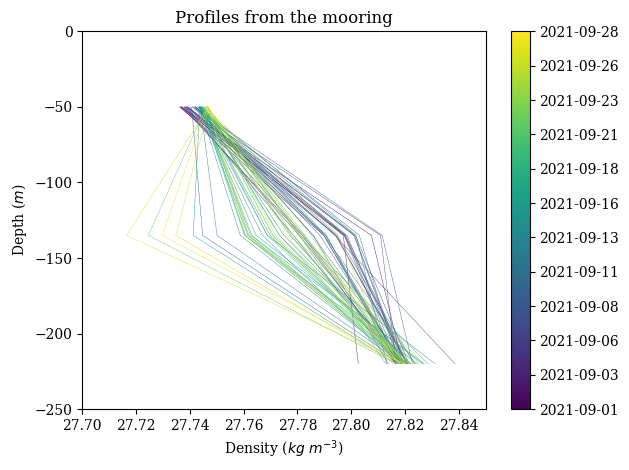

In [7]:
# Plotting the mooring data as profiles

# Init figure
plt.rcParams["font.family"] = "serif" # change the base font
fig, ax = plt.subplots()
ax.set_xlim(27.7,27.85)
ax.set_ylim(-250,0)

# Plotting in a loop
ds_mooring_short = ds_mooring.sel(day=slice(datetime(2021,9,1),datetime(2021,9,30))).isel(day=slice(0,-1,10))
ds_mooring_short = ds_mooring_short.sel(depth=[-50,-135,-220]) # Can comment out if looking at temperature
times = ds_mooring_short['day'].to_numpy()
norm = plt.Normalize(0, len(times)) # Mapping time to the colourbar internal [0, 1] 
cmap = plt.cm.viridis # "viridis" is a nice colourmap that isn't, usually, a problem for people with colourblindness
for n, t in enumerate(times): # Looping through each date...
    c = cmap(norm(n)) # Obtaining the colour 
    ds_mooring_short['pot_rho'].isel(day=n).plot(y='depth', ax=ax, color=c, lw=0.3)
ax.set_xlabel('Density ($kg$ $m^{-3}$)')
ax.set_ylabel('Depth ($m$)')
ax.set_title('Profiles from the mooring')

# The following is almost directly from Copilot, and it handles the colourbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) 
cbar = plt.colorbar(sm, ax=ax)
tick_locs = np.linspace(0, len(times), len(times[::6]))
cbar.set_ticks(tick_locs)
cbar.set_ticklabels([str(tick)[:10] for tick in times[::6]])

plt.tight_layout()

(27.7, 27.84)

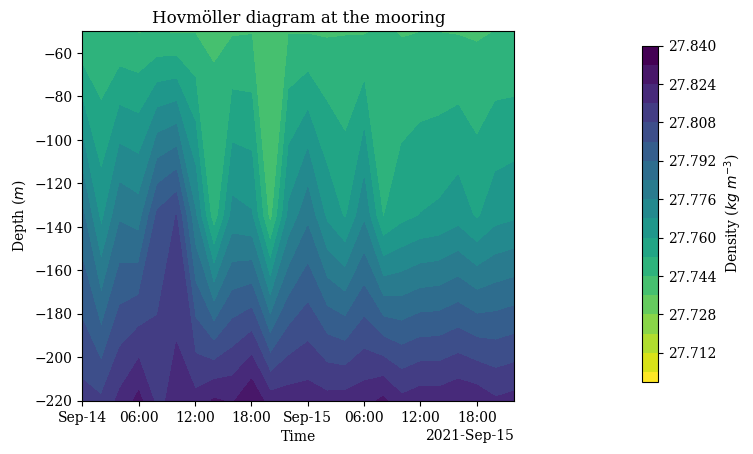

In [8]:
# Plotting the mooring data as a Hovmoller

# Init figure
plt.rcParams["font.family"] = "serif" # change the base font
fig, ax = plt.subplots() 

norm = plt.Normalize(27.70, 27.84) # Mapping time to the colourbar internal [0, 1] 

ds_mooring_short = ds_mooring.sel(day=slice(datetime(2021,9,14),datetime(2021,9,16))).isel(day=slice(0,-1,2))
ds_mooring_short = ds_mooring_short.sel(depth=[-50,-135,-220]) # Can comment out if looking at temperature
p1 = ds_mooring_short['pot_rho'].plot.contourf('day','depth',ax=ax,levels=20,cmap = plt.cm.viridis_r, norm=norm, add_colorbar=False)
ax.set_xlabel('Time')
ax.set_ylabel('Depth ($m$)')
ax.set_title('Hovmöller diagram at the mooring')
ax.set_ylim(-220,-50)

# Handling the colourbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1, 0.15, 0.025, 0.7])
cbar = plt.colorbar(p1, cax=cbar_ax, orientation="vertical", label='Density ($kg$ $m^{-3}$)')
cbar_ax.set_ylim(27.70, 27.84)